In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - Load Data

In [3]:
# load the data
events_df = pd.read_csv('./data/events.csv')

In [4]:
# Convert timestamps to datetime for better readability
events_df['timestamp'] = pd.to_datetime(events_df['timestamp'], unit='ms')

## 2 - Exploratory Data Analysis

In [5]:
# display the first 5 rows of each dataframe
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


### 2.1 - Events overview

#### Event types distribuition

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64


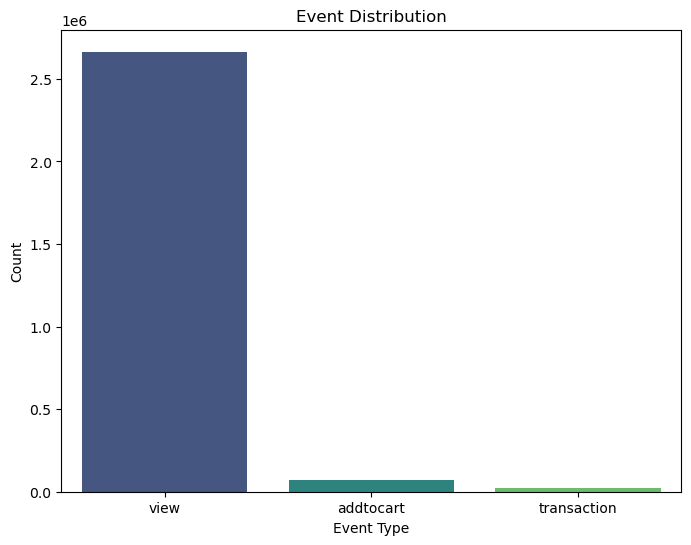

In [8]:
event_counts = events_df['event'].value_counts()
print(event_counts)

# Plot event distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=events_df, x='event', palette='viridis')
plt.title('Event Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

#### Distribution of events over time

<Figure size 1200x600 with 0 Axes>

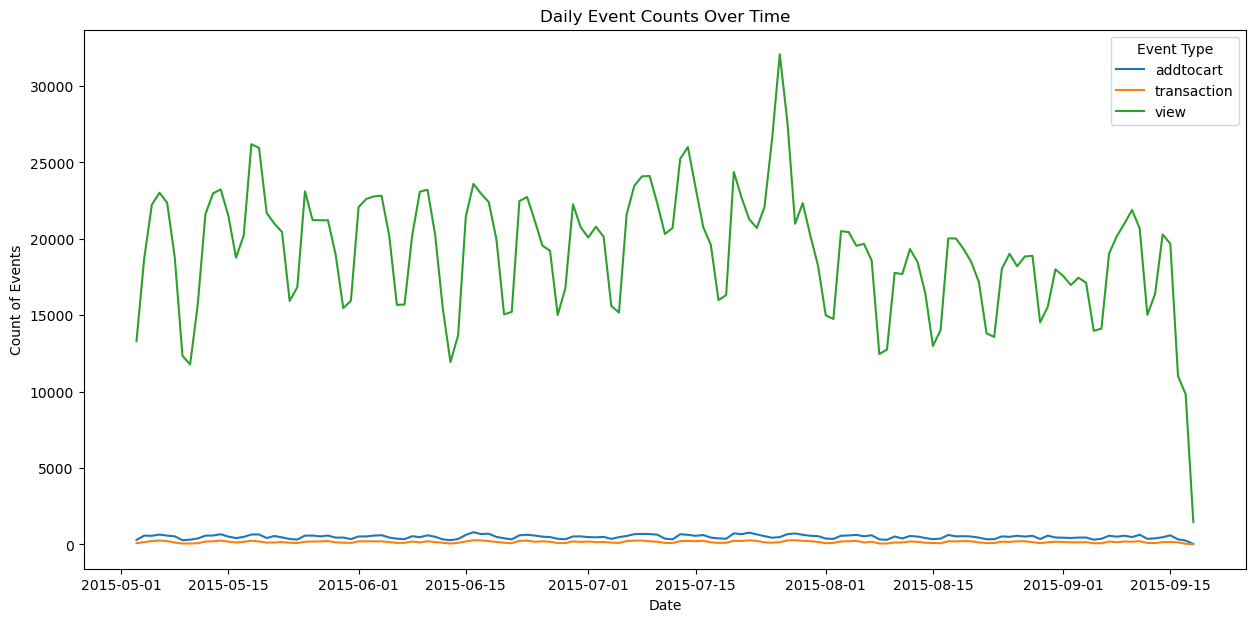

In [9]:
plt.figure(figsize=(12, 6))
events_df['date'] = events_df['timestamp'].dt.date
daily_events = events_df.groupby(['date', 'event']).size().unstack().fillna(0)
daily_events.plot(kind='line', figsize=(15, 7))
plt.title('Daily Event Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Events')
plt.legend(title='Event Type')
plt.show()

#### How many unique users and unique items

In [10]:
unique_visitors = events_df['visitorid'].nunique()
unique_items = events_df['itemid'].nunique()
print(f'Number of unique visitors: {unique_visitors}')
print(f'Number of unique items: {unique_items}')

Number of unique visitors: 1407580
Number of unique items: 235061


#### Visitor activity

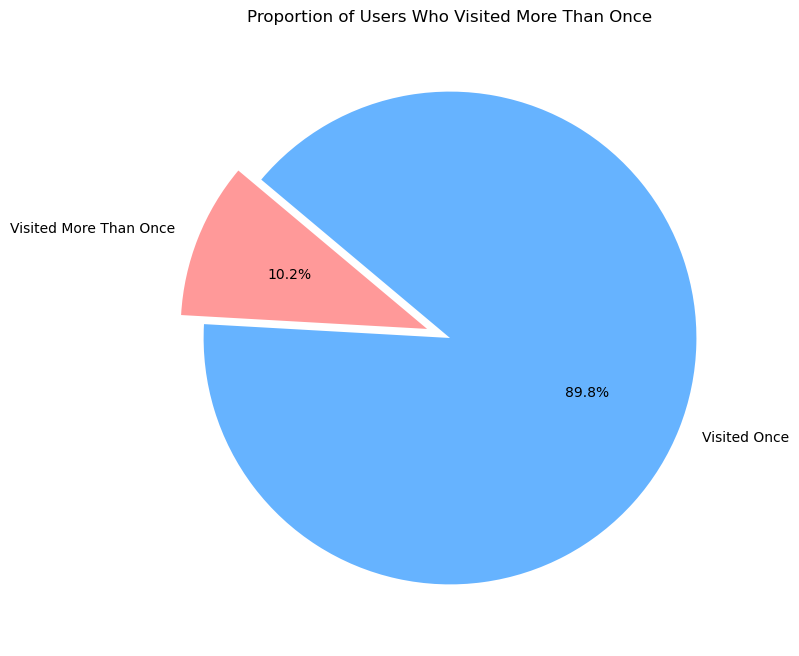

Total users: 1407580
Users who visited more than once: 143769
Proportion of users who visited more than once: 0.10
Proportion of users who visited only once: 0.90


In [11]:
# Extract the date from the timestamp
events_df['date'] = events_df['timestamp'].dt.date

# Number of unique dates each visitor has visited
visitor_revisit_counts = events_df.groupby('visitorid')['date'].nunique()

# Total number of users
total_users = len(visitor_revisit_counts)

# Number of users who visited more than once
more_than_once_users = len(visitor_revisit_counts[visitor_revisit_counts > 1])

# Proportion of users who visited more than once
proportion_more_than_once = more_than_once_users / total_users
proportion_once = 1 - proportion_more_than_once

# Plot the proportions
labels = ['Visited More Than Once', 'Visited Once']
sizes = [proportion_more_than_once, proportion_once]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Users Who Visited More Than Once')
plt.show()

# Proportions
print(f"Total users: {total_users}")
print(f"Users who visited more than once: {more_than_once_users}")
print(f"Proportion of users who visited more than once: {proportion_more_than_once:.2f}")
print(f"Proportion of users who visited only once: {proportion_once:.2f}")

#### Item popularity

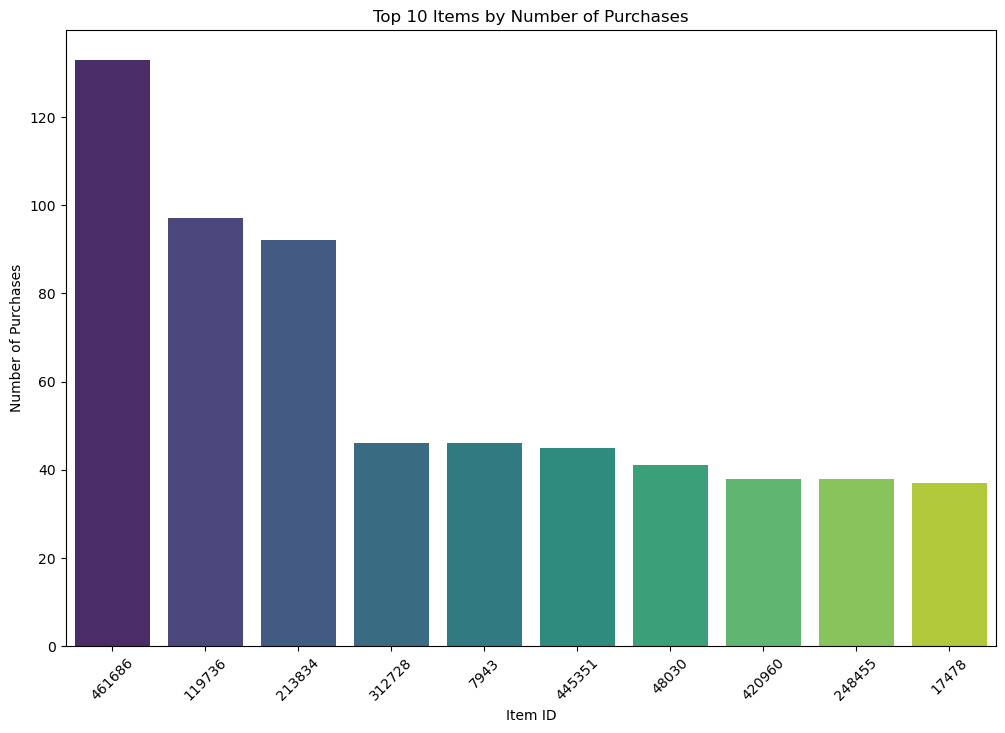

In [12]:
purchases = events_df[events_df['event'] == 'transaction']

# Count the number of transactions per item
item_popularity = purchases['itemid'].value_counts()

# Get the top 10 items
top_10_items = item_popularity.head(10)

# Plot the top 10 items
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_items.index.astype(str), y=top_10_items.values, palette='viridis')
plt.title('Top 10 Items by Number of Purchases')
plt.xlabel('Item ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)  # Rotate item IDs for better readability
plt.show()

#### Distribution of dates

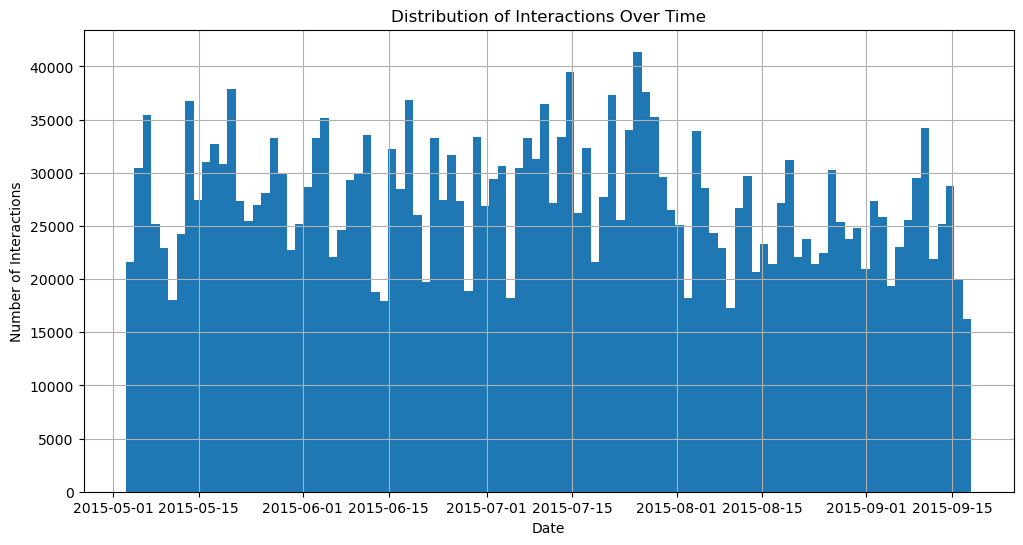

Minimum date: 2015-05-03 03:00:04.384000
Maximum date: 2015-09-18 02:59:47.788000
count                          2756101
mean     2015-07-09 06:48:08.348103680
min         2015-05-03 03:00:04.384000
25%         2015-06-05 04:23:14.792000
50%      2015-07-09 14:43:33.599000064
75%         2015-08-10 16:45:05.168000
max         2015-09-18 02:59:47.788000
Name: timestamp, dtype: object


In [15]:
plt.figure(figsize=(12, 6))
events_df['timestamp'].hist(bins=100)
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.title('Distribution of Interactions Over Time')
plt.show()

# Calculate descriptive statistics
print("Minimum date:", events_df['timestamp'].min())
print("Maximum date:", events_df['timestamp'].max())
print(events_df['timestamp'].describe())